In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Metrics for Evaluation of model Accuracy and F1-score
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
#Importing scikit-learn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
# For splitting of data into train and test set
from sklearn.model_selection import train_test_split , RandomizedSearchCV

In [2]:
data = pd.read_csv("/content/Heart_Disease.csv")

In [3]:
data.rename(columns={'Heart Disease':'HeartOut'}, inplace=True)

In [4]:
data.head(15)

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,HeartOut
0,1,70.0,Female,4,130,322,0,2,109,0,2.4,2,3,3,Private,formerly smoked,Yes
1,2,67.0,Male,3,115,564,0,2,160,0,1.6,2,0,7,Self-employed,never smoked,No
2,3,57.0,Female,2,124,261,0,0,141,0,0.3,1,0,7,Private,never smoked,Yes
3,4,64.0,Female,4,128,263,0,0,105,1,0.2,2,1,7,Private,smokes,No
4,5,74.0,Male,2,120,269,0,2,121,1,0.2,1,1,3,Self-employed,never smoked,No
5,6,65.0,Female,4,120,177,0,0,140,0,0.4,1,0,7,Private,formerly smoked,No
6,7,56.0,Female,3,130,256,1,2,142,1,0.6,2,1,6,Private,never smoked,Yes
7,8,59.0,Female,4,110,239,0,2,142,1,1.2,2,1,7,Private,never smoked,Yes
8,9,60.0,Female,4,140,293,0,2,170,0,1.2,2,2,7,Private,Unknown,Yes
9,10,63.0,Male,4,150,407,0,2,154,0,4.0,2,3,7,Private,Unknown,Yes


###**Data Clean / Encoding**###

In [4]:
data.describe(include = 'all')

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,HeartOut
count,270.000000,264.000000,264,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,261,264,270
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,2
top,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private,never smoked,No
freq,NaN,NaN,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159,96,150
mean,135.500000,54.424242,NaN,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,NaN,NaN,NaN
std,78.086491,9.183488,NaN,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,NaN,NaN,NaN
min,1.000000,29.000000,NaN,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,NaN,NaN,NaN
25%,68.250000,47.000000,NaN,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,NaN,NaN,NaN
50%,135.500000,55.000000,NaN,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,NaN,NaN,NaN
75%,202.750000,61.000000,NaN,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,NaN,NaN,NaN


In [5]:
data.isnull().sum()

id                         0
Age                        6
Gender                     6
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
HeartOut                   0
dtype: int64

In [6]:
# determin categorical from numerical data
for column in data.columns:
    unique_values = len(data[column].unique())
    if unique_values < 5:  
        print(f"{column}: Categorical")
    else:
        print(f"{column}: Numerical")

id: Numerical
Age: Numerical
Gender: Categorical
Chest pain type: Categorical
BP: Numerical
Cholesterol: Numerical
FBS over 120: Categorical
EKG results: Categorical
Max HR: Numerical
Exercise angina: Categorical
ST depression: Numerical
Slope of ST: Categorical
Number of vessels fluro: Categorical
Thallium: Categorical
work_type: Numerical
smoking_status: Numerical
HeartOut: Categorical


In [7]:
#encoding
data['Gender'] = data['Gender'].replace("Female",1)
data['Gender'] = data['Gender'].replace("Male",0)

In [8]:
#replace null values in age with mean
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Age'] = data['Age'].astype('int64')

In [9]:
#replace null values in work/smoking
data['work_type'] = data['work_type'].fillna("Private")
data['smoking_status'] = data['smoking_status'].fillna("never smoked")

In [10]:
#replace null values in Gender with Female as it is the top value
data['Gender'] = data['Gender'].fillna(1)
data['Gender'] = data['Gender'].astype('int64')

In [11]:
#change smoking_status
#not using encoder as this ordered data from 0 to 2 according to smoking
data['smoking_status'] = data['smoking_status'].replace("Unknown",0)
data['smoking_status'] = data['smoking_status'].replace("never smoked",0)
data['smoking_status'] = data['smoking_status'].replace("formerly smoked",1)
data['smoking_status'] = data['smoking_status'].replace("smokes",2)

In [12]:
#encoding work_type using onehotencoder
from sklearn.preprocessing import OneHotEncoder
sk_enc_one = OneHotEncoder()
sk_enc_one.fit(data.work_type.values.reshape(-1,1))


OneHotEncoder()

In [13]:
#transforming work_type column into 5 columns each representing a different category such as private ,self,etc ....
sk_one_val = sk_enc_one.transform(data.work_type.values.reshape(-1,1)).toarray()
sk_one_val

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [14]:
data_one = pd.DataFrame(sk_one_val,columns=["Never_worked","children","Self-employed","Private","Govt_job"])
data_one

,Never_worked,children,Self-employed,Private,Govt_job
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
265,0.0,0.0,1.0,0.0,0.0
266,0.0,0.0,1.0,0.0,0.0
267,1.0,0.0,0.0,0.0,0.0
268,0.0,0.0,0.0,1.0,0.0


In [15]:
#adding the new columns to our df
data = pd.concat([data_one,data],axis=1)

In [16]:
data = data.drop(['work_type'], axis = 1)

In [17]:
 #data type correction
 data["Never_worked"] = data["Never_worked"].astype(int)
 data["children"] = data["children"].astype(int)
 data["Self-employed"] = data["Self-employed"].astype(int)
 data["Private"] = data["Private"].astype(int)
 data["Govt_job"] = data["Govt_job"].astype(int)

In [18]:
#check for duplicated rows
sum(data.duplicated('id')) 

0

In [19]:
#check for duplicated rows
sum(data.duplicated('id')) 

0

### **Outliers Remove**

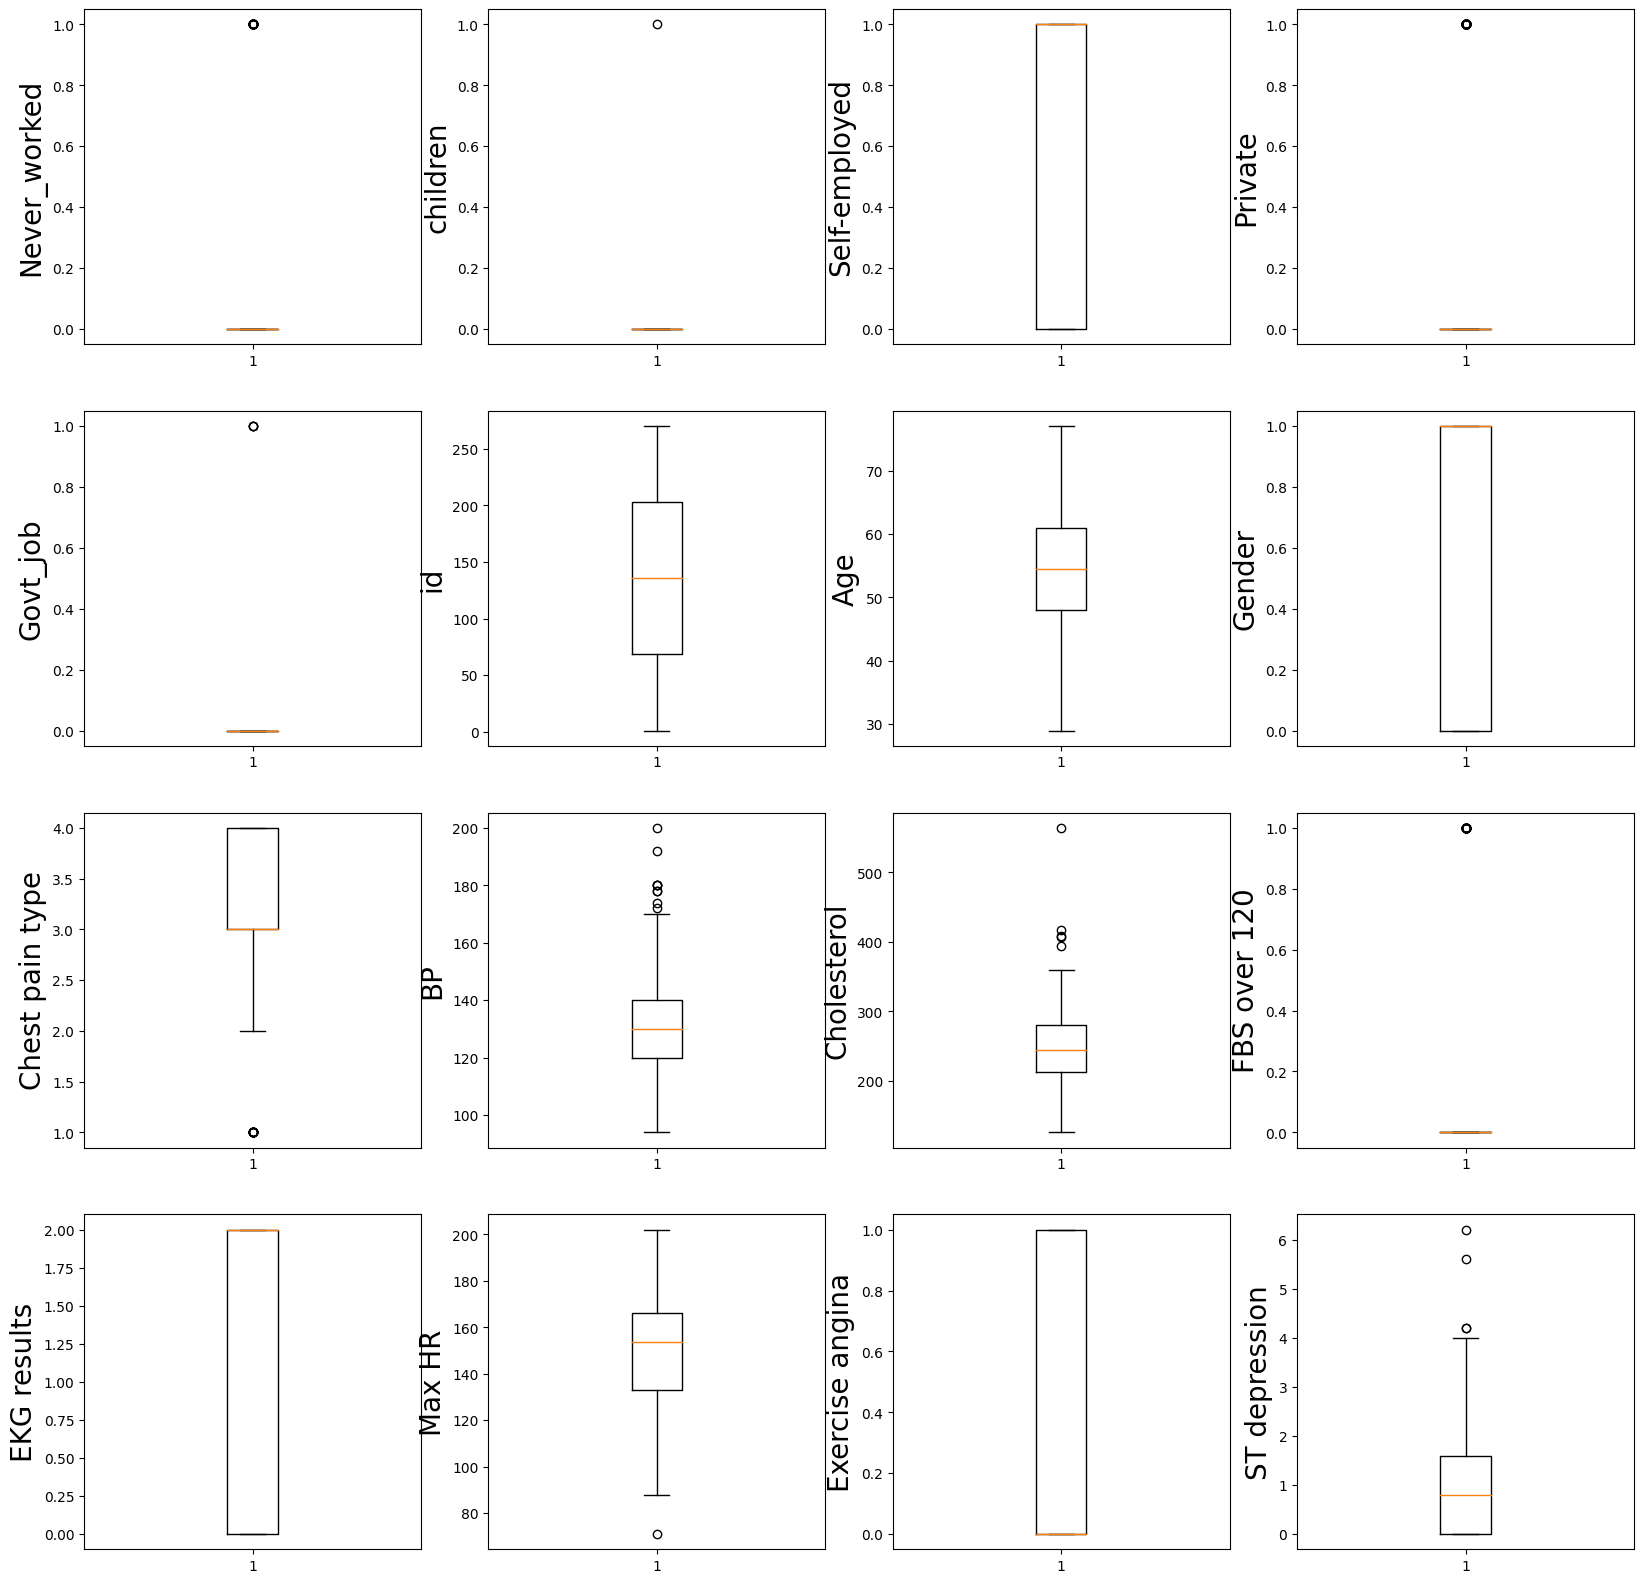

In [20]:
plt.figure(figsize=(20,20), facecolor='white')

plotnumber=1
for column in data.columns:
    if plotnumber<17 :    
        plt.subplot(4,4,plotnumber)  
        plt.boxplot(data[column])
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [21]:
#getting outliers with the iqr method of the BP
Q1 = np.percentile(data['BP'], 25, method = 'midpoint')
Q3 = np.percentile(data['BP'], 75, method = 'midpoint')
IQR = Q3 - Q1
upper_boundBP = data['BP'] >= (Q3+1.5*IQR)
lower_boundBP = data['BP'] <= (Q1-1.5*IQR)
BP_out = np.where(upper_boundBP)[0]
data.loc[BP_out, 'BP'] = Q3

In [22]:
#outliers of the Cholestrol
Q1c = np.percentile(data['Cholesterol'], 25, method = 'midpoint')
Q3c = np.percentile(data['Cholesterol'], 75, method = 'midpoint')
IQRc = Q3c - Q1c
upper_boundc = data['Cholesterol'] >= (Q3c+1.5*IQRc)
lower_boundc = data['Cholesterol'] <= (Q1c-1.5*IQRc)
Ch_out = np.where(upper_boundc)[0]
data.loc[Ch_out, 'Cholesterol'] = Q3c

In [23]:
#outliers of the Max HR
Max = data['Max HR']
M_out = np.where(Max < 75)[0]
q1m = Max.quantile(0.25)
data.loc[M_out, 'Max HR'] = q1m

In [24]:
#outliers of the ST depression
ST = data['ST depression']
ST_out = np.where(ST > 4)[0]
q3s = ST.quantile(0.75)
data.loc[ST_out, 'ST depression'] = q3s

### **Visualization**

<Axes: xlabel='Gender', ylabel='Age'>

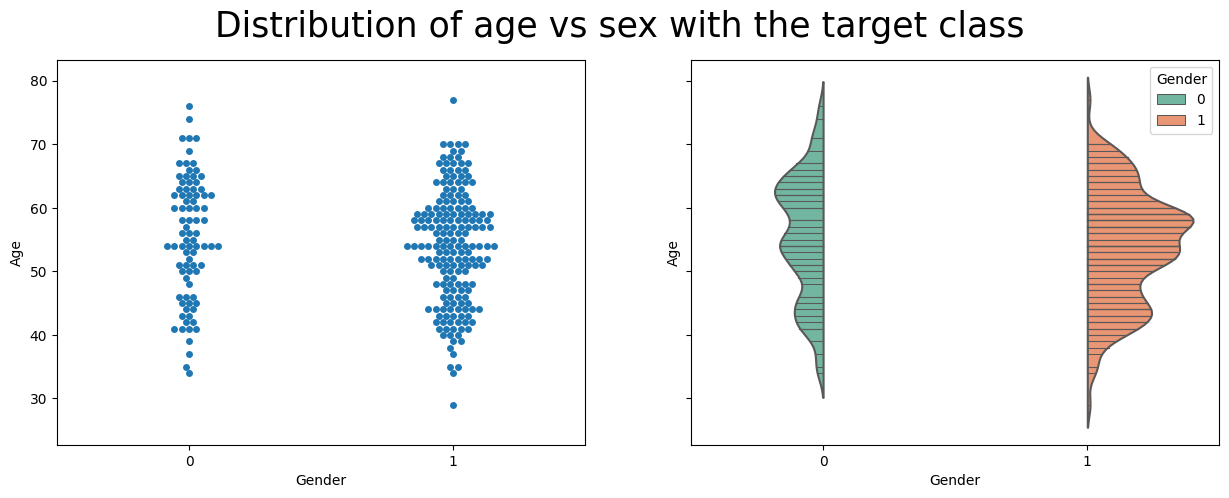

In [29]:
# distribution of sex vs age  with target
import seaborn as sb
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution of age vs sex with the target class',fontsize=25)

sb.swarmplot(ax=axes[0],y = data['Age'], x = data['Gender'])

sb.violinplot(ax=axes[1],x="Gender", y= data['Age'], hue="Gender",
                    data=data, palette="Set2", split=True,
                    scale="count", inner="stick",
                    scale_hue=False, bw=.2)

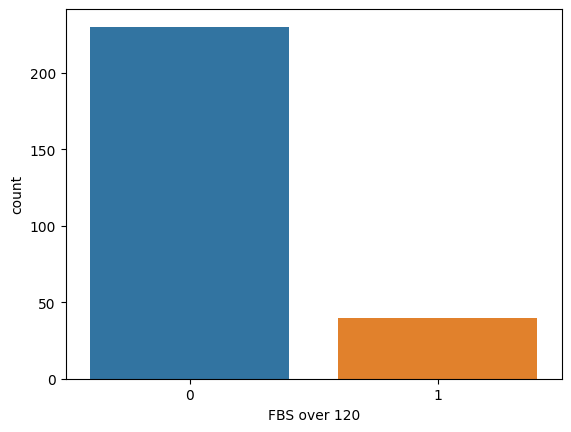

In [30]:
# people with FBS over 120 are less common

sns.countplot(data=data,x="FBS over 120")
plt.show()

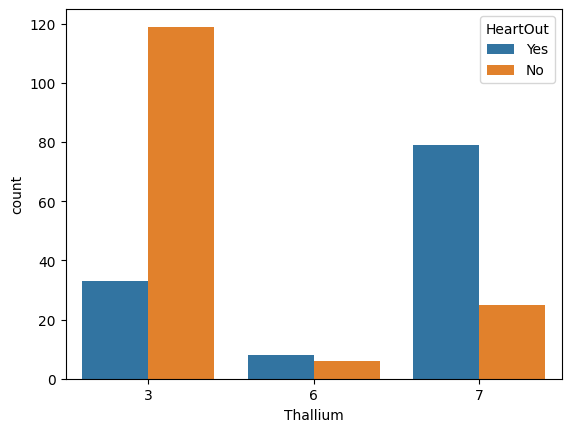

In [28]:
# classfication according to thallium type
sns.countplot(data=data, x="Thallium", hue="HeartOut")
plt.show()

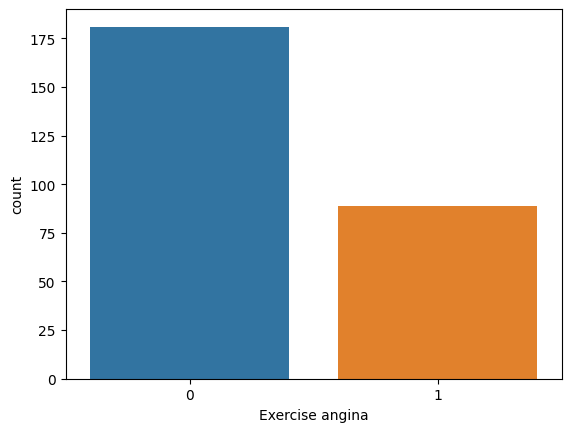

In [32]:
#people with angina are less common
sns.countplot(data=data,x="Exercise angina")
plt.show()

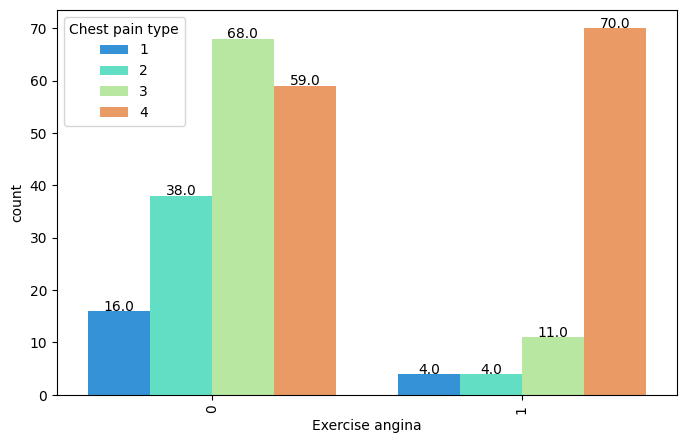

In [33]:
# relation between Exercise angina and Chest pain type
fig, ax1 = plt.subplots(figsize=(8,5))
graph = sns.countplot(ax=ax1,data=data,x = "Exercise angina",hue="Chest pain type",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

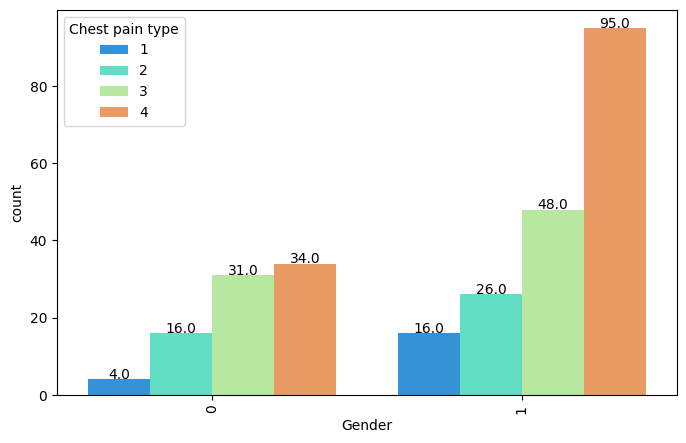

In [34]:
# relation between Gender and Chest pain type
fig, ax1 = plt.subplots(figsize=(8,5))
graph = sns.countplot(ax=ax1,data=data,x = "Gender",hue="Chest pain type",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

<ipython-input-35-5ffa5ec56534>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr().round(2)


<Axes: >

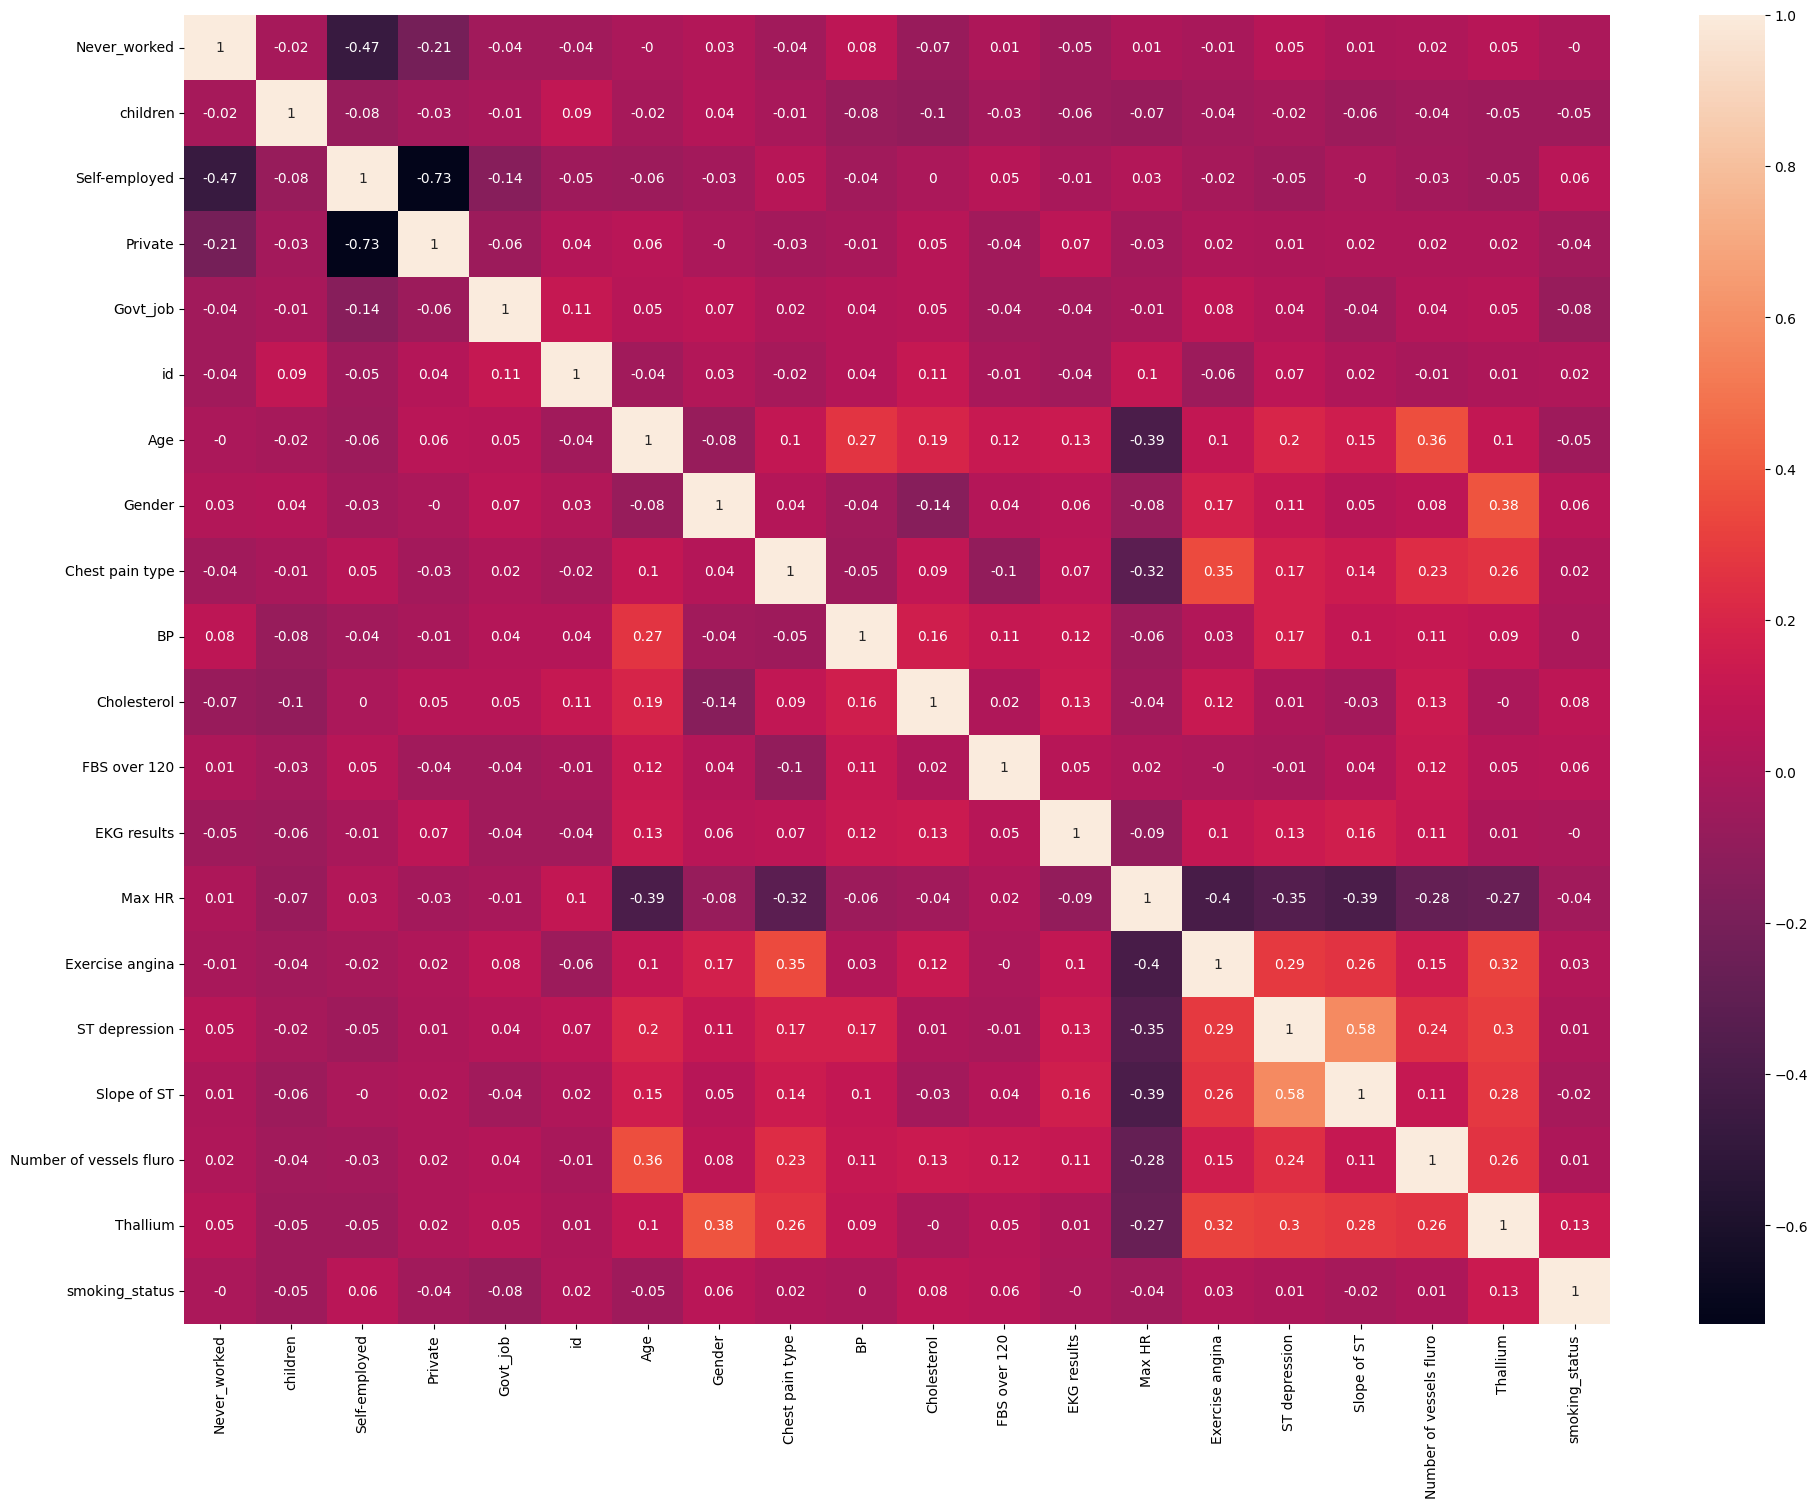

In [35]:
# correlation between features to be used in feature selection
fig,ax = plt.subplots(figsize = (23,17))
corr = data.corr().round(2)
sns.heatmap(corr,annot=True)

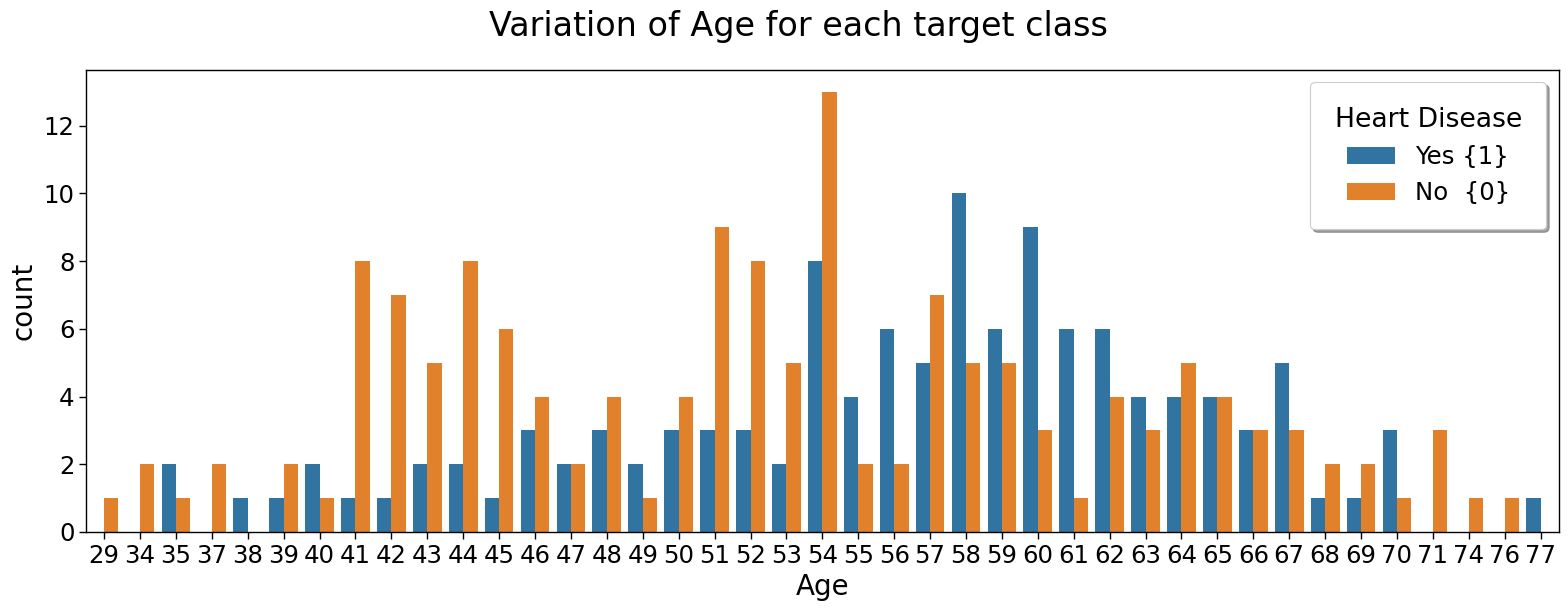

In [36]:
# distribution of age  with the disease
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
fig, ax = plt.subplots(figsize=(19, 6))
a = sns.countplot(ax = ax, data = data, x = 'Age', hue = 'HeartOut', order = data['Age'].sort_values().unique())
legend_labels, _= a.get_legend_handles_labels()
ax.legend(legend_labels, ['Yes {1}','No  {0}'], bbox_to_anchor=(1,1),title="Heart Disease",fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig.suptitle('Variation of Age for each target class')
plt.show()

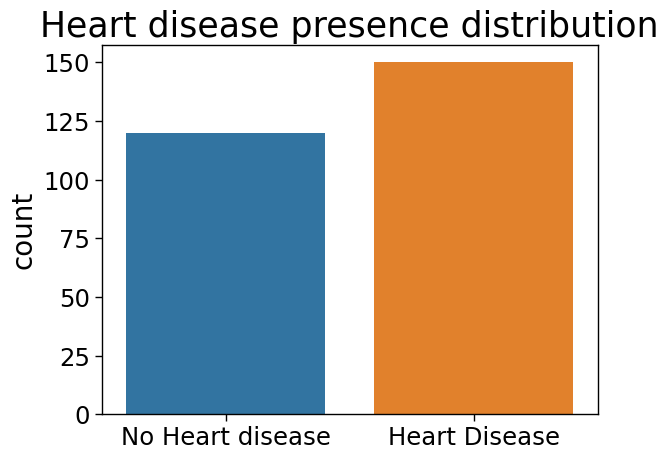

In [37]:
#ppl with heart disease vs with no heart disease
f = sns.countplot(x='HeartOut', data=data)
f.set_title("Heart disease presence distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

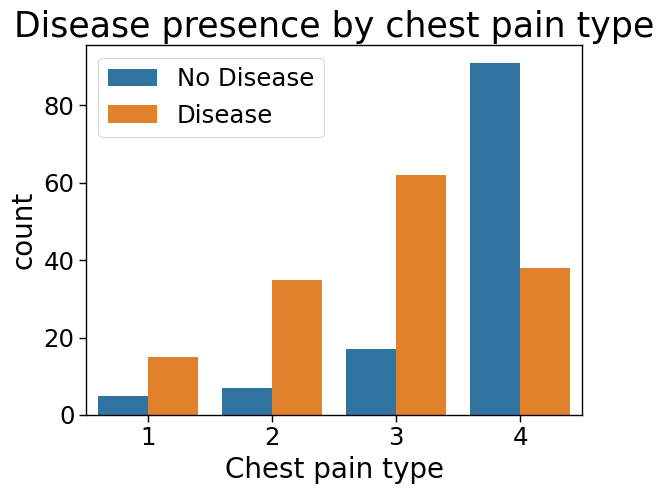

In [38]:
#relation between chest pain type and heart disease
f = sns.countplot(x='Chest pain type', data=data, hue='HeartOut')

f.set_title('Disease presence by chest pain type')
plt.ylabel('count')
plt.xlabel('Chest pain type')
plt.legend(['No Disease', 'Disease']);

### **Splitting data and Scaling**

In [25]:
label_encoder = preprocessing.LabelEncoder()
data['HeartOut']= label_encoder.fit_transform(data['HeartOut'])
#splitting the data
y = data.HeartOut
data = data.drop(['HeartOut'], axis = 1)

In [26]:
# select the columns to scale
cols_to_scale = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the selected columns and transform the data
data_scaled = data.copy()
data_scaled[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [27]:
X = data_scaled
print(X)

     Never_worked  children  Self-employed  Private  Govt_job   id       Age  \
0               0         0              1        0         0    1  1.719483   
1               0         0              0        1         0    2  1.388499   
2               0         0              1        0         0    3  0.285218   
3               0         0              1        0         0    4  1.057515   
4               0         0              0        1         0    5  2.160796   
..            ...       ...            ...      ...       ...  ...       ...   
265             0         0              1        0         0  266 -0.266422   
266             0         0              1        0         0  267 -1.149046   
267             1         0              0        0         0  268  0.174890   
268             0         0              0        1         0  269  0.285218   
269             0         0              1        0         0  270  1.388499   

     Gender  Chest pain type        BP 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


### **Information gain Extraction**

In [29]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Chest pain type            0.191976
Number of vessels fluro    0.176723
Thallium                   0.162527
Exercise angina            0.113822
Slope of ST                0.076149
ST depression              0.072516
Max HR                     0.071563
Gender                     0.068161
EKG results                0.066732
Govt_job                   0.053592
FBS over 120               0.031568
Never_worked               0.022429
Self-employed              0.019920
Cholesterol                0.004739
children                   0.000000
BP                         0.000000
Age                        0.000000
id                         0.000000
Private                    0.000000
smoking_status             0.000000
dtype: float64

<Axes: >

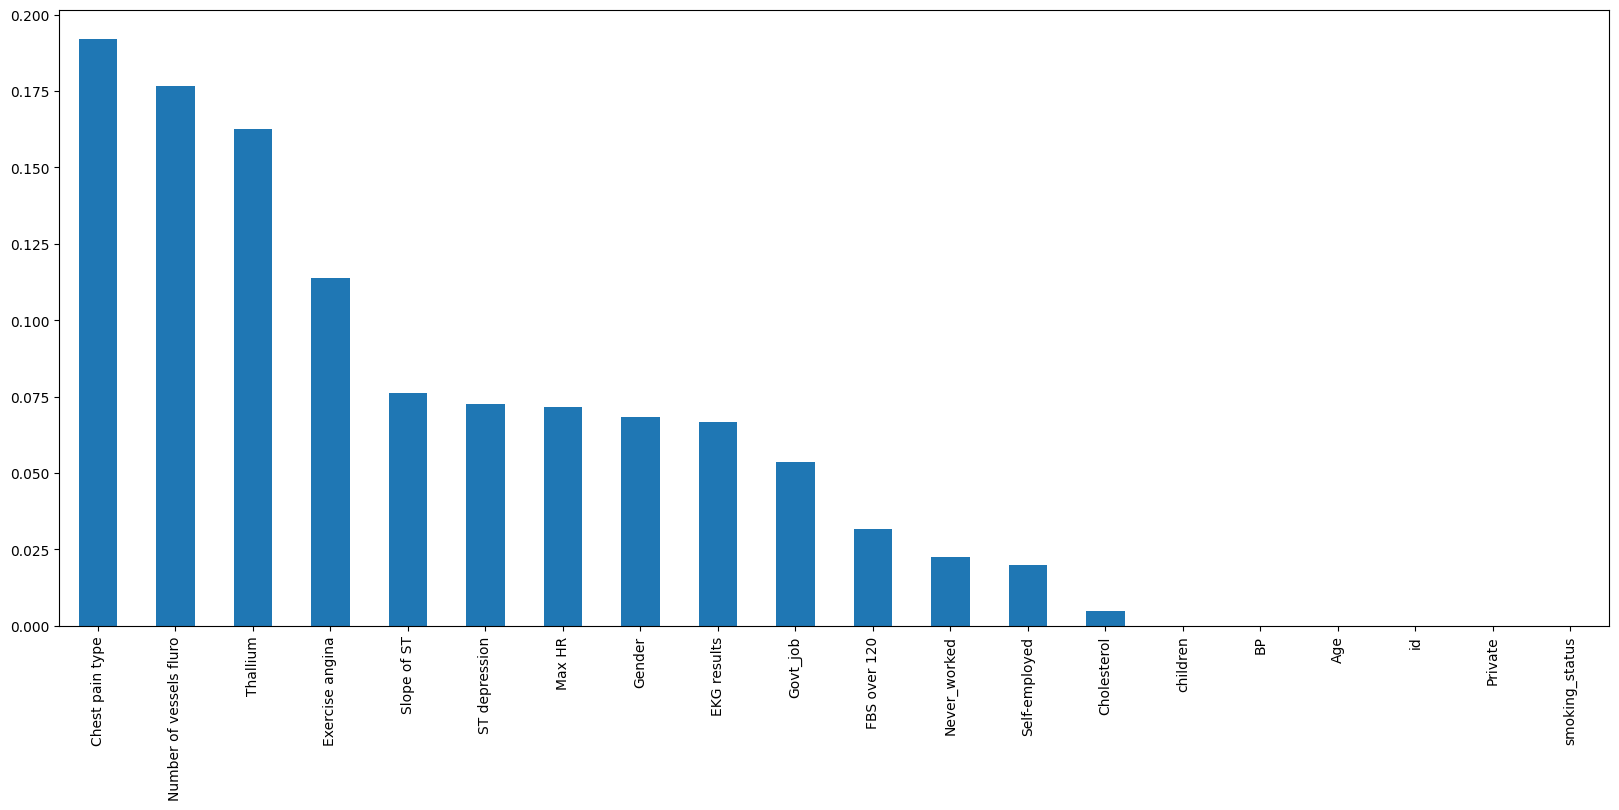

In [30]:
#plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [31]:
#Now we Will select the  top 5 important features
from sklearn.feature_selection import SelectKBest
sel_ele_cols = SelectKBest(mutual_info_classif, k=13)
sel_ele_cols.fit(X_train, y_train)
X_train.columns[sel_ele_cols.get_support()]

Index(['id', 'Age', 'Gender', 'Chest pain type', 'FBS over 120', 'EKG results',
       'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST',
       'Number of vessels fluro', 'Thallium', 'smoking_status'],
      dtype='object')

In [32]:
#removing unrelated features
X_train_sel = sel_ele_cols.transform(X_train)
X_test_sel = sel_ele_cols.transform(X_test)

In [33]:
print(X_train_sel)

[[ 1.35000000e+02 -4.57657186e-02  1.00000000e+00 ...  0.00000000e+00
   7.00000000e+00  0.00000000e+00]
 [ 1.02000000e+02  1.38849921e+00  1.00000000e+00 ...  0.00000000e+00
   3.00000000e+00  0.00000000e+00]
 [ 1.28000000e+02 -2.66421862e-01  0.00000000e+00 ...  0.00000000e+00
   3.00000000e+00  0.00000000e+00]
 ...
 [ 7.30000000e+01  1.71948343e+00  1.00000000e+00 ...  0.00000000e+00
   3.00000000e+00  1.00000000e+00]
 [ 1.60000000e+01  1.82981150e+00  0.00000000e+00 ...  0.00000000e+00
   3.00000000e+00  0.00000000e+00]
 [ 1.69000000e+02 -1.03871836e+00  0.00000000e+00 ...  0.00000000e+00
   3.00000000e+00  1.00000000e+00]]


### **Logistic Model**

In [34]:
#Building the logistic model
from sklearn.linear_model import LogisticRegression
model  = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X_train_sel, y_train)
y_pred = model.predict(X_test_sel)
#get accuracy
accuracy = model.score(X_test_sel, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7777777777777778


### **Random forest model using Grid Search**

In [55]:
#trainning the RandomForest and having a grid of the possible parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=42)

In [56]:
#all possible hyperparameters for the rfc model using grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [57]:
# Perform a grid search 
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_sel, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [58]:
# Print the best hyperparameters with its accuracy
print("Best parameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)
best_params = grid_search.best_params_

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy score: 0.847674418604651


In [59]:
#new model with the optimal hyperparameters
rfc_best = RandomForestClassifier(**best_params)
rfc_best.fit(X_train_sel, y_train)
y_pred = rfc_best.predict(X_test_sel)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
#get accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7962962962962963


### **Decision Tree Model with Hyperparameter tuning**

In [35]:
#building the parameters
parameters = {
              "criterion":("gini","entropy"),
              "splitter":("best","random"),
              "max_depth":(3,5,7,10,11,12),
              "min_samples_split":(2,4,6),
              "max_features":("sqrt","log2","auto"),
              
             }

In [36]:
#using randomsearch
DT_grid = RandomizedSearchCV(DecisionTreeClassifier(),param_distributions= parameters, cv=5 , verbose=True)

In [37]:
DT_grid.fit(X_train_sel,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 10, 11, 12),
                                        'max_features': ('sqrt', 'log2',
                                                         'auto'),
                                        'min_samples_split': (2, 4, 6),
                                        'splitter': ('best', 'random')},
                   verbose=True)

In [38]:
print(DT_grid.best_estimator_)

DecisionTreeClassifier(max_depth=3, max_features='log2', min_samples_split=6,
                       splitter='random')


In [39]:
#building the model with the best parameters
DT_model = DT_grid.best_estimator_

In [40]:
DT_model.fit(X_train_sel,y_train)

DecisionTreeClassifier(max_depth=3, max_features='log2', min_samples_split=6,
                       splitter='random')

In [41]:
#get accuracy
print (f'Accuracy - : {DT_model.score(X_test_sel,y_test):.3f}')

Accuracy - : 0.704


### **SVM Model**

In [42]:
# Train a linear SVM
linear_svm = SVC(kernel='linear', C=1.0, random_state=0)
linear_svm.fit(X_train_sel, y_train)

# Evaluate the linear SVM on the testing data
linear_accuracy = linear_svm.score(X_test_sel, y_test)
print('Linear SVM accuracy:', linear_accuracy)

Linear SVM accuracy: 0.7407407407407407


In [43]:
# Train a kernel SVM with an RBF kernel
kernel_svm = SVC(kernel='rbf', gamma=0.7, C=1.0, random_state=0)
kernel_svm.fit(X_train_sel, y_train)

# Evaluate the kernel SVM on the testing data
kernel_accuracy = kernel_svm.score(X_test_sel, y_test)
print('Kernel SVM accuracy:', kernel_accuracy)

Kernel SVM accuracy: 0.5925925925925926


### **Model Evaluation**

In [57]:
#get confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[33 20]
 [ 8 29]]


In [58]:
#get classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        53
           1       0.59      0.78      0.67        37

    accuracy                           0.69        90
   macro avg       0.70      0.70      0.69        90
weighted avg       0.72      0.69      0.69        90



In [59]:
#get the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.3111111111111111
